In [8]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [9]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [10]:
path = r'C:\Users\sanch\Documents\CareerFoundry\Achievement 6'

In [11]:
# Import data
df_1 = pd.read_csv(os.path.join(path, '1. Data', 'New_Student_Rolls.csv'))

In [12]:
df_1.columns

Index(['School ID', 'School Name', 'Year', 'School Decile', 'School Type',
       'School Authority', 'School Gender', 'Regional Council', 'Total Roll',
       'Māori', 'Pacific', 'Asian', 'MELAA', 'Other', 'European/ Pākehā',
       'International Fee Paying', 'All Funded', 'Alternative Education',
       'International Fee Paying.1', 'Secondary-Tertiary Programme',
       'Immersion Level 1', 'Immersion Level 2', 'Immersion Level 3',
       'Immersion Level 4A', 'Immersion Level 4B', 'Immersion Level 5',
       'Immersion Taha Māori', 'Immersion None', 'Decile Band',
       'High Immersion %', 'None Immersion %'],
      dtype='object')

In [13]:
df_1.head()

,School ID,School Name,Year,School Decile,School Type,School Authority,School Gender,Regional Council,Total Roll,Māori,...,Immersion Level 2,Immersion Level 3,Immersion Level 4A,Immersion Level 4B,Immersion Level 5,Immersion Taha Māori,Immersion None,Decile Band,High Immersion %,None Immersion %
0,1,Te Kura o Te Kao,2010,2.0,Full Primary,State: Not integrated,Co-Ed,Northland,27,27,...,0,0,10,17,0,0,0,Low decile,0.0,0.0
1,1,Te Kura o Te Kao,2011,2.0,Full Primary,State: Not integrated,Co-Ed,Northland,30,30,...,0,0,30,0,0,0,0,Low decile,0.0,0.0
2,1,Te Kura o Te Kao,2012,2.0,Full Primary,State: Not integrated,Co-Ed,Northland,26,26,...,0,26,0,0,0,0,0,Low decile,0.0,0.0
3,1,Te Kura o Te Kao,2013,2.0,Full Primary,State: Not integrated,Co-Ed,Northland,31,31,...,0,31,0,0,0,0,0,Low decile,0.0,0.0
4,1,Te Kura o Te Kao,2014,2.0,Full Primary,State: Not integrated,Co-Ed,Northland,32,32,...,18,0,0,0,0,0,0,Low decile,43.8,0.0


In [14]:
# Select the relevant variables for clustering
cols = ['School Decile', 'Māori', 'European/ Pākehā', 'Immersion Level 1', 'Immersion None']
df = df_1.loc[:, cols].dropna().reset_index(drop=True)

In [15]:
df.head()

,School Decile,Māori,European/ Pākehā,Immersion Level 1,Immersion None
0,2.0,27,0,0,0
1,2.0,30,0,0,0
2,2.0,26,0,0,0
3,2.0,31,0,0,0
4,2.0,32,0,14,0


In [16]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [17]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-5360960104.084422,
 -1920021810.744632,
 -1332663976.6012459,
 -994851327.728047,
 -902984486.303611,
 -724449052.1391538,
 -650623158.0722247,
 -572975228.9601781,
 -579870064.5483062]

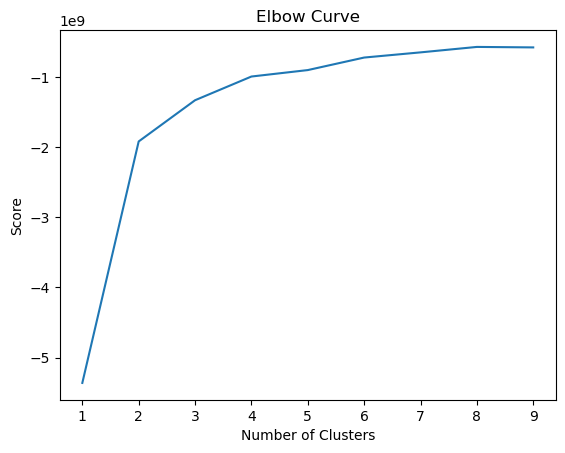

In [18]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
plt.savefig(r"C:\Users\sanch\Documents\CareerFoundry\Achievement 6\3. Visualisations\elbow_curve.png")
pl.show()

#### **Note.** The elbow occurs at k = 3, where the curve starts to flatten, so I selected three clusters.

In [19]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [20]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [21]:
# Fit the k-means object to the data.

df['clusters'] = kmeans.fit_predict(df)

In [22]:
df.head()

,School Decile,Māori,European/ Pākehā,Immersion Level 1,Immersion None,clusters
0,2.0,27,0,0,0,0
1,2.0,30,0,0,0,0
2,2.0,26,0,0,0,0
3,2.0,31,0,0,0,0
4,2.0,32,0,14,0,0


In [23]:
df['clusters'].value_counts()

clusters
0    33983
2     2627
1     1151
Name: count, dtype: int64

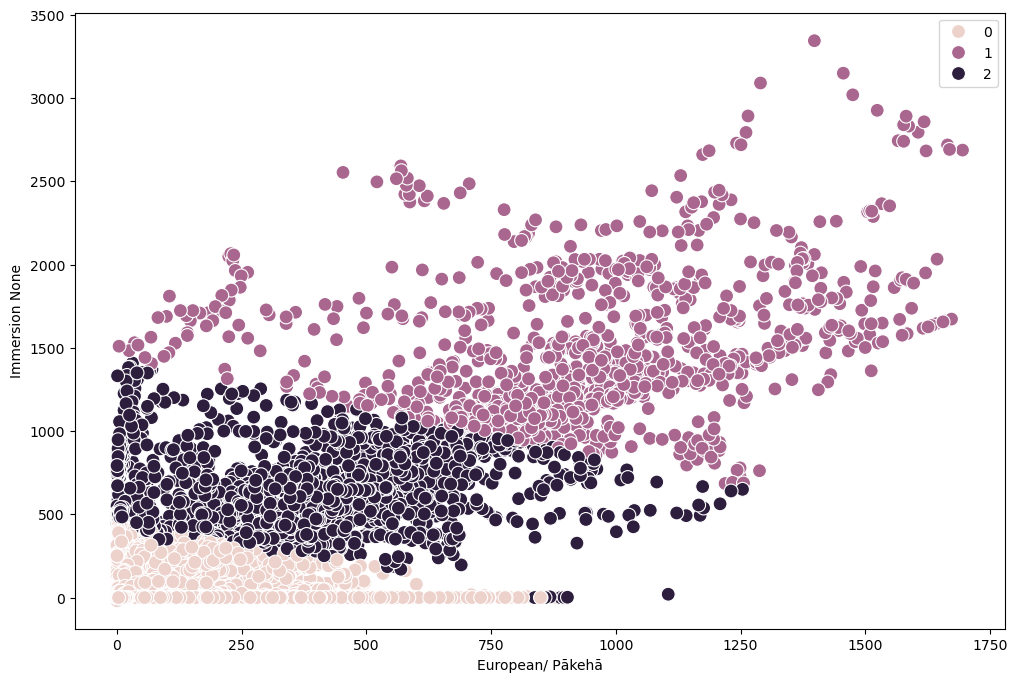

In [24]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['European/ Pākehā'], y=df['Immersion None'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('European/ Pākehā') # Label x-axis.
plt.ylabel('Immersion None') # Label y-axis.
plt.savefig(r"C:\Users\sanch\Documents\CareerFoundry\Achievement 6\3. Visualisations\cluster_euro_none.png")
plt.show()

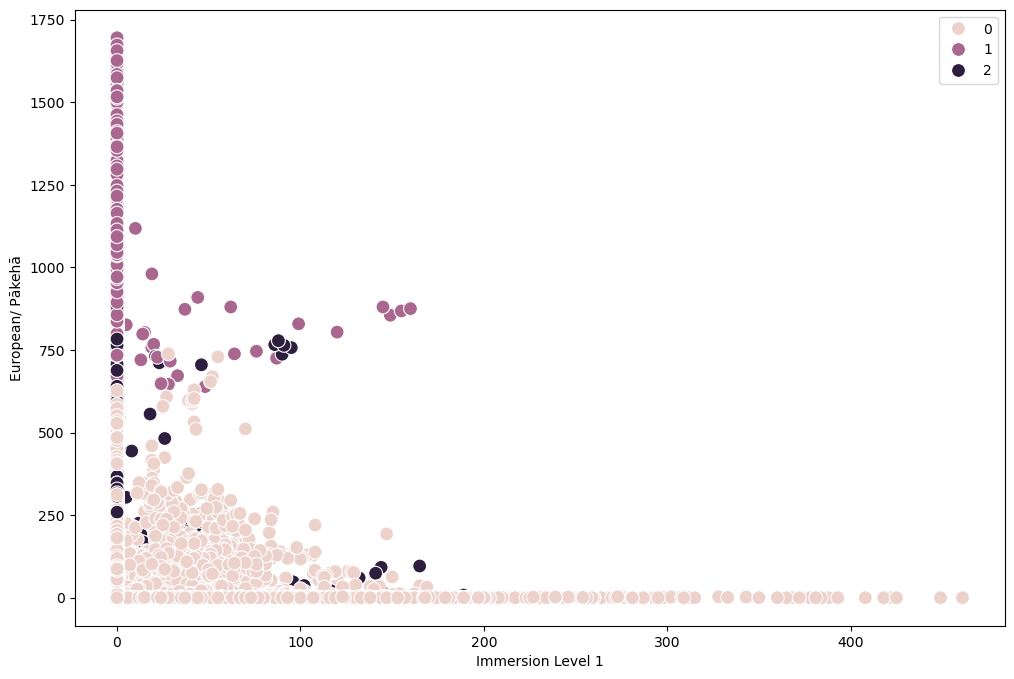

In [25]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Immersion Level 1'], y=df['European/ Pākehā'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Immersion Level 1') # Label x-axis.
plt.ylabel('European/ Pākehā') # Label y-axis.
plt.savefig(r"C:\Users\sanch\Documents\CareerFoundry\Achievement 6\3. Visualisations\scatterplot_euro_high_test.png")
plt.show()

In [26]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [31]:
df.groupby('cluster').agg({'School Decile':['mean', 'median'], 
                          'Immersion Level 1':['mean', 'median'], 
                         'Immersion None':['mean', 'median'], 
                         'European/ Pākehā':['mean', 'median'],
                         'Māori':['mean', 'median']})

School Decile        Immersion Level 1        Immersion None  \
                     mean median              mean median           mean   
cluster                                                                    
dark purple      6.016749    6.0          1.105824    0.0     609.555767   
pink             5.348851    5.0          6.376335    0.0      10.457081   
purple           7.479583    8.0          1.301477    0.0    1447.424848   

                    European/ Pākehā              Māori         
             median             mean median        mean median  
cluster                                                         
dark purple   580.0       396.073087  385.0  168.086791  131.0  
pink            0.0       110.162787   70.0   61.321249   39.0  
purple       1343.0       934.667246  922.0  248.835795  217.0

**Dark Purple:**
- School Decile: represents relatively higher socio-economic status (*M* = 7.47).
- Immersion Level 1: includes a minimal number of students enrolled in the highest immersion programmes (*M* = 1.31).
- Immersion None: Represents a markedly disproportionate number of students relative to Immersion Level 1 (*M* = 1450.99).
- European/Pākehā: has the largest number of European/Pākehā students among the three clusters (*M* = 935.47).
- Māori: has a slightly higher number of Māori students but a smaller proportion overall than the other two clusters (*M* = 250.68).

    **Insight:** This cluster likely represents students from the highest decile schools. Only a few are enrolled in Immersion Level 1 programmes, while a substantially larger proportion participate in Immersion None. In terms of ethnicity, the cluster comprises a large proportion of European/Pākehā students, with only a small fraction identifying as Māori.
  
**Pink:**
- School Decile: represents slightly lower socio-economic status than the previous cluster (*M* = 6.03).
- Immersion Level 1: includes a minimal number of students enrolled in the highest immersion programmes (*M* = 1.11).
- Immersion None: includes a much larger number of students compared to Immersion Level 1, moderate among the three clusters (*M* = 613.02).
- European/Pākehā: has a moderate number of European/Pākehā students among the three clusters (*M* = 397.94).
- Māori: has a moderate proportion of Māori students compared with the previous cluster (*M* = 167.99).

    **Insight:** This cluster likely represents students from mid-decile schools. Only a small number are enrolled in Immersion Level 1 programmes, while the majority participate in Immersion None. In terms of ethnicity, the cluster comprises a moderate proportion of European/Pākehā students and a relatively small number of Māori students.

**Purple:**
- School Decile: represents the lowest socio-economic status among the three clusters (*M* = 5.35).
- Immersion Level 1: includes the highest number of students enrolled in the highest immersion programmes (*M* = 6.37).
- Immersion None: includes the smallest number of students among the three clusters (*M* = 10.60).
- European/Pākehā: has the smallest number of European/Pākehā students among the three clusters (*M* = 110.28).
- Māori: has a moderate proportion of Māori students, similar to the previous cluster (*M* = 61.38).

    **Insight:** This cluster likely represents students from lower-decile schools. A relatively high number are enrolled in Immersion Level 1 programmes, while more participate in Immersion None. In terms of ethnicity, the cluster includes a moderate proportion of European/Pākehā students and a small fraction of Māori students.

In [30]:
df.columns

Index(['School Decile', 'Māori', 'European/ Pākehā', 'Immersion Level 1',
       'Immersion None', 'clusters', 'cluster'],
      dtype='object')

In [28]:
# --- Save the updated dataset ---
output_path = r"C:\Users\sanch\Documents\CareerFoundry\Achievement 6\1. Data\New_Student_Rolls_1.csv"
df.to_csv(output_path, index=False, encoding='utf-8-sig')